In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Задание 1: Экспоненциальное и нормальное распределение

# Параметры для распределений
n_samples_100 = 100
n_samples_1000 = 1000

In [3]:
# Экспоненциальное распределение
lambda_exp = 1  # Параметр распределения
exp_sample_100 = np.random.exponential(1/lambda_exp, n_samples_100)
exp_sample_1000 = np.random.exponential(1/lambda_exp, n_samples_1000)

In [4]:
# Нормальное распределение
mu_norm = 0  # Среднее нормального распределения
sigma_norm = 1  # Стандартное отклонение нормального распределения
norm_sample_100 = np.random.normal(mu_norm, sigma_norm, n_samples_100)
norm_sample_1000 = np.random.normal(mu_norm, sigma_norm, n_samples_1000)

In [5]:
# Функция для расчета выборочной статистики
def sample_stats(sample, distribution_name, n):
    mean = np.mean(sample)
    var = np.var(sample)
    quantile_50 = np.quantile(sample, 0.5)
    quantile_99 = np.quantile(sample, 0.99)

    if distribution_name == "exponential":
        theoretical_mean = 1 / lambda_exp
        theoretical_var = 1 / lambda_exp**2
        theoretical_quantiles = stats.expon.ppf([0.5, 0.99], scale=1/lambda_exp)
    elif distribution_name == "normal":
        theoretical_mean = mu_norm
        theoretical_var = sigma_norm**2
        theoretical_quantiles = stats.norm.ppf([0.5, 0.99], loc=mu_norm, scale=sigma_norm)

    print(f"Выборочное среднее для {distribution_name} (n={n}): {mean:.4f}")
    print(f"Теоретическое среднее для {distribution_name}: {theoretical_mean:.4f}")
    print(f"Выборочная дисперсия для {distribution_name} (n={n}): {var:.4f}")
    print(f"Теоретическая дисперсия для {distribution_name}: {theoretical_var:.4f}")
    print(f"Выборочная квантиль 0.5 для {distribution_name} (n={n}): {quantile_50:.4f}")
    print(f"Теоретическая квантиль 0.5 для {distribution_name}: {theoretical_quantiles[0]:.4f}")
    print(f"Выборочная квантиль 0.99 для {distribution_name} (n={n}): {quantile_99:.4f}")
    print(f"Теоретическая квантиль 0.99 для {distribution_name}: {theoretical_quantiles[1]:.4f}\n")

In [6]:
# Расчеты для экспоненциального распределения
sample_stats(exp_sample_100, "exponential", n_samples_100)
sample_stats(exp_sample_1000, "exponential", n_samples_1000)

# Расчеты для нормального распределения
sample_stats(norm_sample_100, "normal", n_samples_100)
sample_stats(norm_sample_1000, "normal", n_samples_1000)

Выборочное среднее для exponential (n=100): 1.0783
Теоретическое среднее для exponential: 1.0000
Выборочная дисперсия для exponential (n=100): 0.9846
Теоретическая дисперсия для exponential: 1.0000
Выборочная квантиль 0.5 для exponential (n=100): 0.8717
Теоретическая квантиль 0.5 для exponential: 0.6931
Выборочная квантиль 0.99 для exponential (n=100): 4.2127
Теоретическая квантиль 0.99 для exponential: 4.6052

Выборочное среднее для exponential (n=1000): 0.9933
Теоретическое среднее для exponential: 1.0000
Выборочная дисперсия для exponential (n=1000): 0.9218
Теоретическая дисперсия для exponential: 1.0000
Выборочная квантиль 0.5 для exponential (n=1000): 0.7116
Теоретическая квантиль 0.5 для exponential: 0.6931
Выборочная квантиль 0.99 для exponential (n=1000): 4.2649
Теоретическая квантиль 0.99 для exponential: 4.6052

Выборочное среднее для normal (n=100): 0.0404
Теоретическое среднее для normal: 0.0000
Выборочная дисперсия для normal (n=100): 1.3002
Теоретическая дисперсия для nor

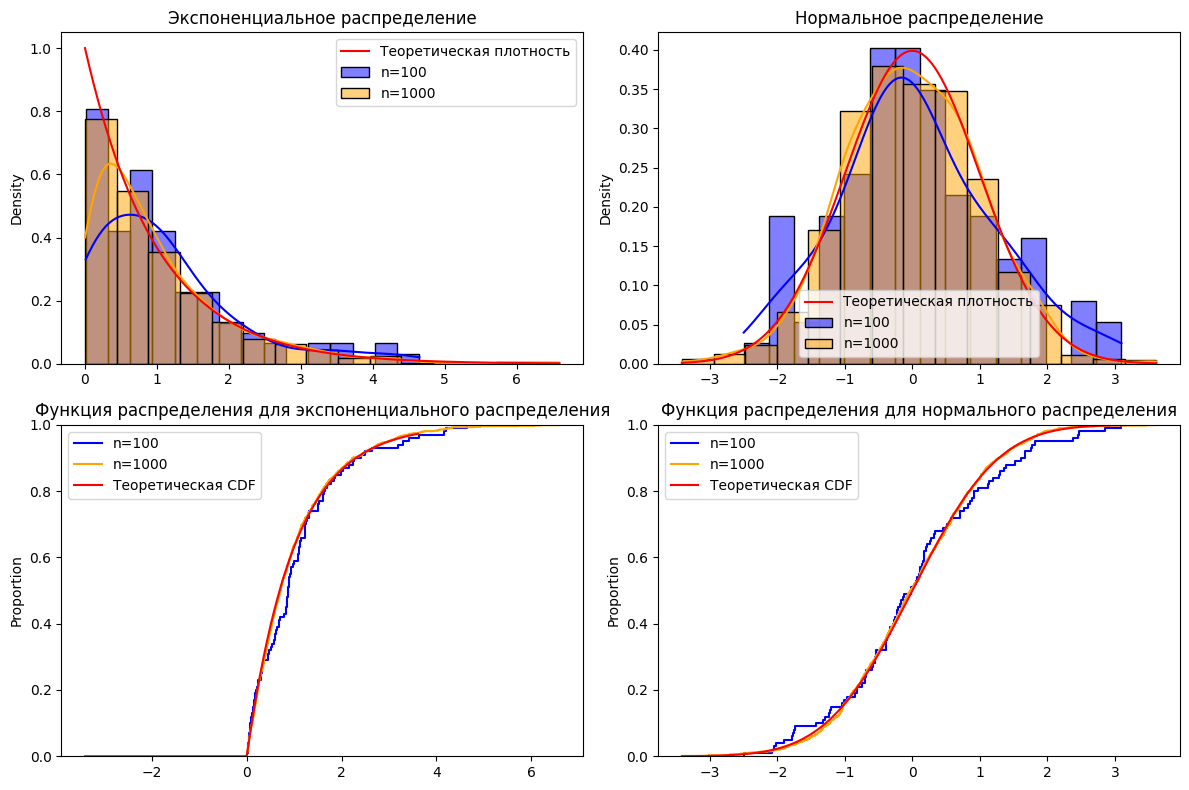

In [7]:
# Визуализация: Гистограммы и плотности

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Гистограммы экспоненциального распределения
sns.histplot(exp_sample_100, kde=True, stat="density", ax=axs[0, 0], color='blue', label='n=100', bins=15)
sns.histplot(exp_sample_1000, kde=True, stat="density", ax=axs[0, 0], color='orange', label='n=1000', bins=15)
x_vals = np.linspace(0, np.max(exp_sample_1000), 1000)
axs[0, 0].plot(x_vals, stats.expon.pdf(x_vals, scale=1/lambda_exp), 'r-', label="Теоретическая плотность")
axs[0, 0].set_title("Экспоненциальное распределение")
axs[0, 0].legend()

# Гистограммы нормального распределения
sns.histplot(norm_sample_100, kde=True, stat="density", ax=axs[0, 1], color='blue', label='n=100', bins=15)
sns.histplot(norm_sample_1000, kde=True, stat="density", ax=axs[0, 1], color='orange', label='n=1000', bins=15)
x_vals = np.linspace(np.min(norm_sample_1000), np.max(norm_sample_1000), 1000)
axs[0, 1].plot(x_vals, stats.norm.pdf(x_vals, loc=mu_norm, scale=sigma_norm), 'r-', label="Теоретическая плотность")
axs[0, 1].set_title("Нормальное распределение")
axs[0, 1].legend()

# Эмпирические функции распределения
sns.ecdfplot(exp_sample_100, ax=axs[1, 0], color='blue', label='n=100')
sns.ecdfplot(exp_sample_1000, ax=axs[1, 0], color='orange', label='n=1000')
axs[1, 0].plot(x_vals, stats.expon.cdf(x_vals, scale=1/lambda_exp), 'r-', label="Теоретическая CDF")
axs[1, 0].set_title("Функция распределения для экспоненциального распределения")
axs[1, 0].legend()

sns.ecdfplot(norm_sample_100, ax=axs[1, 1], color='blue', label='n=100')
sns.ecdfplot(norm_sample_1000, ax=axs[1, 1], color='orange', label='n=1000')
axs[1, 1].plot(x_vals, stats.norm.cdf(x_vals, loc=mu_norm, scale=sigma_norm), 'r-', label="Теоретическая CDF")
axs[1, 1].set_title("Функция распределения для нормального распределения")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

В первой части лабораторной работы были сгенерированы выборки из экспоненциального и нормального распределений для размеров 100 и 1000, а также произведены расчёты:

Экспоненциальное распределение:

Выборочное среднее для обеих выборок (100 и 1000) достаточно близко к теоретическому значению (1.0000).
Дисперсия выборки из 100 элементов отличается от теоретической (1.0000), но с увеличением числа элементов (до 1000) точность увеличивается.
Квантиль 0.5 и 0.99 для меньшей выборки отклоняются сильнее, чем для большей, что показывает улучшение точности с ростом выборки.
Нормальное распределение:

Выборочное среднее для обеих выборок приближено к теоретическому значению (0.0000).
Дисперсия также становится ближе к теоретической (1.0000) с увеличением числа элементов в выборке.
Квантиль 0.5 и 0.99 для выборки из 1000 элементов точнее соответствует теоретическим значениям.
На графиках отображены гистограммы и плотности распределения для обеих выборок, а также функции распределения для эмпирических и теоретических данных. Видно, что с увеличением объема выборки аппроксимация становится точнее.

Задание 2

In [8]:
# Задание 2: Расстояние между случайными точками в прямоугольнике

# Параметры прямоугольника
a = 10  # Длина
b = 30  # Ширина

# Функция для расчета расстояния между двумя случайными точками
def random_distances(n):
    # Генерация координат точек
    x1, y1 = np.random.uniform(0, a, n), np.random.uniform(0, b, n)
    x2, y2 = np.random.uniform(0, a, n), np.random.uniform(0, b, n)

    # Расстояние между точками
    distances = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distances



In [9]:
# Генерация выборок
dist_sample_100 = random_distances(100)
dist_sample_1000 = random_distances(1000)
dist_sample_10000 = random_distances(10000)

In [11]:
# Средние расстояния
mean_100 = np.mean(dist_sample_100)
mean_1000 = np.mean(dist_sample_1000)
mean_10000 = np.mean(dist_sample_10000)

print(f"Среднее расстояние (n=100): {mean_100:.4f}")
print(f"Среднее расстояние (n=1000): {mean_1000:.4f}")
print(f"Среднее расстояние (n=10000): {mean_10000:.4f}")

Среднее расстояние (n=100): 11.6582
Среднее расстояние (n=1000): 11.0359
Среднее расстояние (n=10000): 11.0111


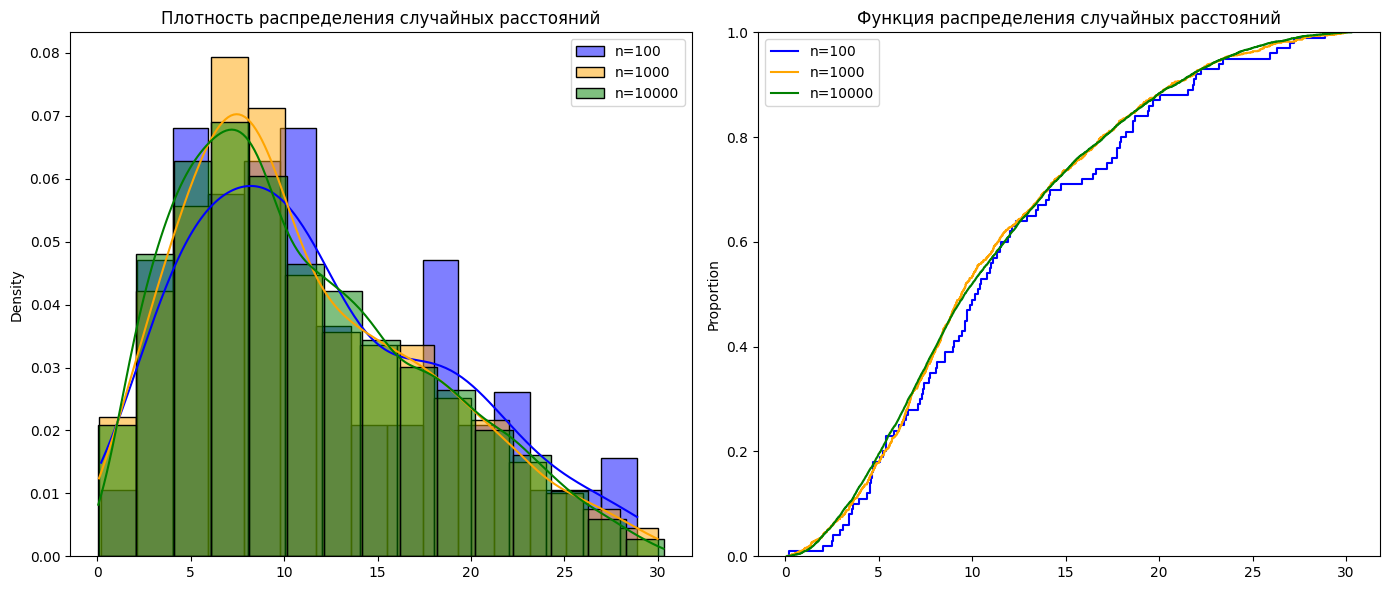

In [12]:
# Визуализация: Гистограммы и функции распределения
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Гистограммы плотности вероятностей
sns.histplot(dist_sample_100, kde=True, stat="density", ax=axs[0], color='blue', label='n=100', bins=15)
sns.histplot(dist_sample_1000, kde=True, stat="density", ax=axs[0], color='orange', label='n=1000', bins=15)
sns.histplot(dist_sample_10000, kde=True, stat="density", ax=axs[0], color='green', label='n=10000', bins=15)
axs[0].set_title("Плотность распределения случайных расстояний")
axs[0].legend()

# Эмпирические функции распределения
sns.ecdfplot(dist_sample_100, ax=axs[1], color='blue', label='n=100')
sns.ecdfplot(dist_sample_1000, ax=axs[1], color='orange', label='n=1000')
sns.ecdfplot(dist_sample_10000, ax=axs[1], color='green', label='n=10000')
axs[1].set_title("Функция распределения случайных расстояний")
axs[1].legend()

plt.tight_layout()
plt.show()

Во втором задании были сгенерированы выборки случайных расстояний между точками в прямоугольнике со сторонами 10 и 30 для размеров 100, 1000 и 10000.

Результаты:

Средние расстояния приближаются к значению около 11.14 с увеличением размера выборки.
Графики показывают, что плотность распределения и функция распределения становятся более гладкими и точными с увеличением числа точек (от 100 до 10000).
Это демонстрирует, что увеличение числа экспериментов улучшает точность аппроксимации функции и плотности распределения.